In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Corporates Structure
Image a corporate has many organizations, and each organization operates on many sites. A site is characterized by its name, uid, address, and a site have multiple of those can be used to refer to the same site. A site also has a parent organization that it belongs to. Lets build up a corporate structure to implement all of this.

The link to the mindmap of the overview of the tree:
https://miro.com/app/board/o9J_lTBj874=/

In [17]:
class Site():
    
    '''
    A site object with different attributes
    '''
    
    def __init__(self):
        
        self.name = [] # list of names belongs to the same site
        self.id = None # unique site id in the corps
        self.uid = []  # list of uid belong to the same site
        self.parent = None # the parent org of the site
        self.parent_id = None # unique org id in the corps
        self.address = [] # list of addresses belongs to the same site
    
    def add_name(self,name):
        '''
        add name to the name list
        '''
        if name.isalnum() and name not in self.name:
            self.name.append(name)
            
    def add_uid(self,uid):
        '''
        add uid to the uid list
        '''
        if uid.isalnum() and uid not in self.uid:
            self.uid.append(uid)
            
    def add_address(self,address):
        '''
        add address to the address list
        '''
        if address.isalnum() and address not in self.address:
            self.address.append(address)
    
    def process(self, record):
        
        '''
        process record entry to initilize the site info
        '''
        
        name, org, uid, address = list(map(lambda x:x.strip(),record.split(',')))
        
        self.add_name(name)
        self.parent = org
        self.add_uid(uid)
        self.add_address(address)
        
    def get_site_info(self):
        
        '''
        return all site infor for debugging
        '''
        
        return self.name,self.id,self.uid,self.parent,self.parent_id,self.address

In [18]:
class Organization():
    
    '''
    An organization object with different attributes and site children
    '''
    
    def __init__(self):
        
        self.org_id = None # unique org id in the corps
        self.name = [] # list of names belong to the same org
        self.address = [] # list of addresses belongs to the same org
        self.children_ids = set() # a set of children sites
    
    def add_name(self,name):
        if name.isalnum() and name not in self.name:
            self.name.append(name)
    
    def add_address(self,address):
        if address.isalnum() and address not in self.address:
            self.address.append(address)
        
    def add_site(self,site_id):
        if site_id not in self.children_ids:
            self.children_ids.add(site_id)
        
    def get_site(self):
        return self.children_ids

In [19]:
class Corporates():
    
    def __init__(self):
        
        '''
        A few look up dictionary for fast check if the new site exists
        '''
        
        # all organs names list refers to their organ internal id
        self.organ_names = {'NoName':0}
        
        # all sites names list refers to site internal id
        self.site_names = {}
        
        # all sites uids list refers to site internal id
        self.site_uids = {}
        
        # all sites addresses list refers to site internal id
        self.site_addresses = {}
        
        # number of sites in the corp
        self.number_of_sites = 0
        
        # number of organs in the corp
        self.number_of_orgs = 0
        
        # store all site instances
        self.sites = {}
        
        # create an org for new sites without org info
        noname_org = Organization()
        noname_org.org_id = 0
        noname_org.name = 'NoName'
        
        # store all orgs instances
        self.organs = {0:noname_org}
    
    def add_site(self,site):
        
        # parse site info
        site_name = site.name[0] if site.name else ''
        site_uid = site.uid[0] if site.uid else ''
        site_address = site.address[0] if site.address else ''
        
        # check if the site name or uid can be used to find if the site exists
        if site_name.isalnum() and site_name in self.site_names:
            site.id = self.site_names[site_name] 

        elif site_uid.isalnum() and site_uid in self.site_uids:
            site.id = self.site_uids[site_uid] 
        
        # if this is a new site 
        if not site.id:
            site.id = self.number_of_sites = self.number_of_sites + 1
            
            # if this new site has organization info
            if site.parent.isalnum():

                # check if the org name exists
                if site.parent in self.organ_names:
                    site.parent_id = self.organ_names[site.parent] 

                # not found, create a new org
                if not site.parent_id:       
                    site.parent_id = self.number_of_orgs = self.number_of_orgs + 1
                    
                    self.organ_names[site.parent] = site.parent_id
                    organ = Organization()
                    organ.org_id = site.parent_id

                else:
                    # if exist, retrive the organizatio object
                    organ = self.organs[site.parent_id]
                    
                organ.add_name(site.parent)
                
            # a new site doesn't provide organization name    
            else:
                
                organ = self.organs[0]
                organ.children_ids.add(site.id)
                self.organs[organ.org_id] = organ
            
            # update organization's site list
            organ.add_site(site.id)
            
            # update corp's organ list
            self.organs[organ.org_id] = organ
            
            # update corp' site list
            self.sites[site.id] = site
            
        else:
            old_site = self.sites[site.id]
            old_site.add_name(site_name)
            old_site.add_uid(site_uid)
            old_site.add_address(site_address)
            self.sites[site.id] = old_site
                
            
        # update corp's sites look up info
        if site_name.isalnum():
            self.site_names[site_name] = site.id 
        if site_uid.isalnum():
            self.site_uids[site_uid] = site.id
        if site_address.isalnum():
            self.site_addresses[site_address] = site.id
    
    def get_info(self):
        
        return self.organ_names,self.site_names,self.site_uids,self.site_addresses,self.number_of_sites,self.number_of_orgs

In [20]:
# site name, org name, site uid, site address
sites_records = [
'a1b1,abc,10000,XXX',
'a1b2,   ,10001,YYY',
'a1b3,bca,10002,   ',
'a1b4,   ,10000,ZZZ',
'a1b5,cba,10000,   ',
'    ,   ,10000,SSS',
'a1b1,   ,     ,TTT',
'a1b7,bca,10003,QQQ'
]

# sites_records = [
#     'a1b1, abc, 10000, ABC',
#     'a1b2, abc , 10001, BCA']

corps = Corporates()

for record in sites_records:

    current_site = Site()
    current_site.process(record)
    # print(current_site.get_site_info())
    corps.add_site(current_site)
    # print(corps.get_info())

for org in corps.organs.values():
    print(f'organization: {org.name}')
    sites = org.get_site()
    print(f'sites: {[corps.sites[site].name for site in sites]}')
    print(f'sites uids: {[corps.sites[site].uid for site in sites]}')
    print(f'sites addresses: {[corps.sites[site].address for site in sites]}')
    print('')

organization: NoName
sites: [['a1b2']]
sites uids: [['10001']]
sites addresses: [['YYY']]

organization: ['abc']
sites: [['a1b1', 'a1b4', 'a1b5']]
sites uids: [['10000']]
sites addresses: [['XXX', 'ZZZ', 'SSS', 'TTT']]

organization: ['bca']
sites: [['a1b3'], ['a1b7']]
sites uids: [['10002'], ['10003']]
sites addresses: [[], ['QQQ']]



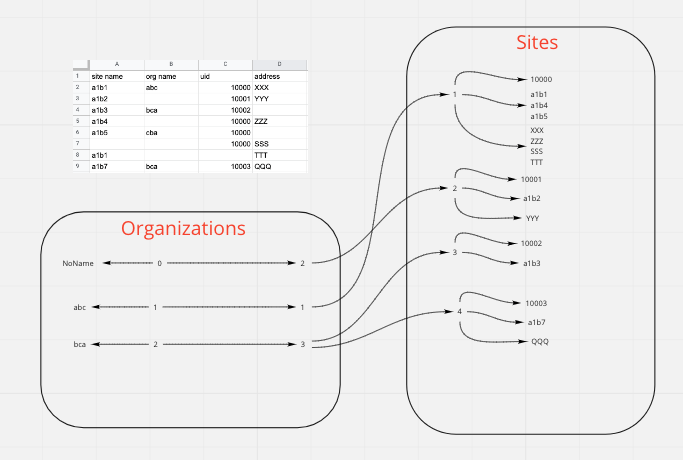

## insert new record to existing corporate

In [21]:
record = 'a1b8, bbb, 10002, HHH'

current_site = Site()
current_site.process(record)
corps.add_site(current_site)

for org in corps.organs.values():
    print(f'organization: {org.name}')
    sites = org.get_site()
    print(f'sites: {[corps.sites[site].name for site in sites]}')
    print(f'sites uids: {[corps.sites[site].uid for site in sites]}')
    print(f'sites addresses: {[corps.sites[site].address for site in sites]}')
    print('')

organization: NoName
sites: [['a1b2']]
sites uids: [['10001']]
sites addresses: [['YYY']]

organization: ['abc']
sites: [['a1b1', 'a1b4', 'a1b5']]
sites uids: [['10000']]
sites addresses: [['XXX', 'ZZZ', 'SSS', 'TTT']]

organization: ['bca']
sites: [['a1b3', 'a1b8'], ['a1b7']]
sites uids: [['10002'], ['10003']]
sites addresses: [['HHH'], ['QQQ']]



## export corporation to a pickle file

In [22]:
import pickle

In [23]:
pickle.dump(corps, open('my_corp.pickle','wb'))

In [24]:
new_corps = pickle.load(open('my_corp.pickle','rb'))

In [25]:
for org in corps.organs.values():
    print(f'organization: {org.name}')
    sites = org.get_site()
    print(f'sites: {[corps.sites[site].name for site in sites]}')
    print(f'sites uids: {[corps.sites[site].uid for site in sites]}')
    print(f'sites addresses: {[corps.sites[site].address for site in sites]}')
    print('')

organization: NoName
sites: [['a1b2']]
sites uids: [['10001']]
sites addresses: [['YYY']]

organization: ['abc']
sites: [['a1b1', 'a1b4', 'a1b5']]
sites uids: [['10000']]
sites addresses: [['XXX', 'ZZZ', 'SSS', 'TTT']]

organization: ['bca']
sites: [['a1b3', 'a1b8'], ['a1b7']]
sites uids: [['10002'], ['10003']]
sites addresses: [['HHH'], ['QQQ']]

